<a href="https://colab.research.google.com/github/sandeshsk12/housing_price/blob/main/housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Importing packages

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# importing necessary data

In [155]:
# importing data
data=pd.read_csv('train.csv')

# Exploring data 

In [156]:
# number of rows and columns
print('Number of records: ',data.shape[0])
print()
print('Number of features: ',data.shape[1])

Number of records:  1460

Number of features:  81


In [157]:
# looking at a few records 
data.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
199    200          20       RL         76.0     9591   Pave   NaN      Reg   
66      67          20       RL          NaN    19900   Pave   NaN      Reg   
1035  1036          20       RL          NaN    11500   Pave   NaN      IR1   
1303  1304          20       RL         73.0     8688   Pave   NaN      Reg   
886    887          90       RL         70.0     8393   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
199          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
66           Lvl    AllPub    Inside       Gtl        NAmes       PosA   
1035         Lvl    AllPub   CulDSac       Gtl      Edwards       Norm   
1303         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
886          Lvl    AllPub    Corner       Gtl        NAmes       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
199        Norm     1Fam     1Story            8            5       2004   
66         Norm     1Fam     1Story            7            5       1970   
1035       Norm     1Fam     1Story            4            3       1957   
1303       Norm     1Fam     1Story            7            5       2005   
886        Norm   Duplex     1Story            5            5       1959   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
199           2005       Hip  CompShg     VinylSd     VinylSd    BrkFace   
66            1989     Gable  CompShg     Plywood     Plywood    BrkFace   
1035          1957     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1303          2005     Gable  CompShg     VinylSd     VinylSd    BrkFace   
886           2005     Gable  CompShg     MetalSd     MetalSd    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
199        262.0        Gd        TA      PConc       Ex       TA   
66         287.0        TA        TA     CBlock       Gd       TA   
1035         0.0        TA        Gd       Slab      NaN      NaN   
1303       228.0        Gd        TA      PConc       Gd       TA   
886        122.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
199            Av          GLQ        1088          Unf           0   
66             Gd          GLQ         912          Unf           0   
1035          NaN          NaN           0          NaN           0   
1303           Av          Unf           0          Unf           0   
886            No          LwQ         528          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
199         625         1713    GasA        Ex          Y      SBrkr   
66         1035         1947    GasA        TA          Y      SBrkr   
1035          0            0    GasA        Ex          N      SBrkr   
1303       1616         1616    GasA        Ex          Y      SBrkr   
886        1098         1626    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
199       1713         0             0       1713             1             0   
66        2207         0             0       2207             1             0   
1035       845         0             0        845             0             0   
1303      1616         0             0       1616             0             0   
886       1712         0             0       1712             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
199          2         0             3             1          Ex   
66           2         0             3             1          TA   
1035         1         0             3             1          TA   
1303         2         0             3             1          Gd   
886          2         0             4             2          TA   

   

In [158]:
#using info() to understand the data types of the columns
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

> observation
1. There are a total of 1460 enteries with 81 columns
2. Of the 81 columns, 3 are of float type, 35 int type and 43 are object (text) type

In [159]:
# Having a look at the numerical variables
num_cols=data.describe().columns.to_list()
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

> Observation 
1. LotArea appears to be highly skewed.
2. The total rooms above ground is also higly skewed with around 75 % of the houses having less than 7 rooms
3. Almost all of the houses were sold in the 4 years (2006-2010).
4. Sale price has a range of $720100.0

In [160]:
# Looking at object columns
cat_cols=data.describe(include=['O']).columns.to_list()
data.describe(include=['O'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

> Observation
1. Northwest Ames is the most frequent 
2. Most of the houses are under the zone of Residential Low Density
3. 1 Story appears to be very popular
4. Almost all houses have heating Gas forced warm air furnace


In [161]:
# understanding the number of unique values in each column
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [162]:
#looking at only numerical cols, if they are categorical in nature
data[num_cols].nunique()

Id               1460
MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [163]:
# segregating columns according to data

num_cols_but_categorical=['MSSubClass']
num_discrete_cols=['id','OverallQual','OverallCond',
                   'BsmtFullBath','BsmtHalfBath',
                   'FullBath','HalfBath','BedroomAbvGr',
                   'KitchenAbvGr','TotRmsAbvGrd',
                   'Fireplaces','GarageCars','MoSold']
num_cont_cols=['LotFrontage','LotArea','YearBuilt',
               'YearRemodAdd','MasVnrArea','BsmtFinSF1',
               'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
               '1stFlrSF','2ndFlrSF','LowQualFinSF',
               'GrLivArea','GarageYrBlt','GarageArea',
               'WoodDeckSF','OpenPorchSF','OpenPorchSF',
               'EnclosedPorch','3SsnPorch','ScreenPorch',
               'PoolArea','MiscVal','YrSold','SalePrice']
cat_cols=[['MSZoning', 'Street', 'Alley', 'LotShape',
 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
 'SaleType', 'SaleCondition', 'MSSubClass']


In [164]:
# We found MSSubClass to be categorical but already encoded, hence we add it to  the list of categorical type
cat_cols.extend(num_cols_but_categorical)

In [165]:
# We drop id from numerical cols as it does not help in our analysis
num_discrete_cols.remove('id')

# Checking for missing values

Before checking for missing values, we need to understand the data first. On going through the data dictionary, we can see that for certain columns, NA is not "unavailable or missing" but rather carries some meaning to it

In [166]:
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [167]:
# hence we impute proper variables to such columns 
data['Alley'].fillna('No alley access',inplace=True)
data['BsmtQual'].fillna('No Basement',inplace=True)
data['BsmtCond'].fillna('No Basement',inplace=True)
data['BsmtExposure'].fillna('No Basement',inplace=True)
data['BsmtFinType1'].fillna('No Basement',inplace=True)
data['BsmtFinType2'].fillna('No Basement',inplace=True)
data['FireplaceQu'].fillna('No Fireplace',inplace=True)
data['GarageType'].fillna('No Garage',inplace=True)
data['GarageFinish'].fillna('No Garage',inplace=True)
data['GarageQual'].fillna('No Garage',inplace=True)
data['GarageCond'].fillna('No Garage',inplace=True)
data['PoolQC'].fillna('No Pool',inplace=True)
data['Fence'].fillna('No Fence',inplace=True)
data['MiscFeature'].fillna('No Extra feature',inplace=True)

In [168]:
#Dropping rows with more than 70% values missing. 81 * 0.70 = 57 variables
data.dropna(axis=0,how='any',thresh=57,inplace=True)

In [169]:
# percentage of missing data
100*(data.isna().sum().sort_values(ascending=False).head(10))/len(data)
#only top 10 are displayed as there are a large number of columns

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
KitchenQual     0.000000
GarageType      0.000000
FireplaceQu     0.000000
Fireplaces      0.000000
Functional      0.000000
dtype: float64

In [170]:
data[(data['GarageType']=='No Garage')]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
39      40          90       RL         65.0     6040   Pave  No alley access   
48      49         190       RM         33.0     4456   Pave  No alley access   
78      79          90       RL         72.0    10778   Pave  No alley access   
88      89          50  C (all)        105.0     8470   Pave  No alley access   
89      90          20       RL         60.0     8070   Pave  No alley access   
99     100          20       RL         77.0     9320   Pave  No alley access   
108    109          50       RM         85.0     8500   Pave  No alley access   
125    126         190       RM         60.0     6780   Pave  No alley access   
127    128          45       RM         55.0     4388   Pave  No alley access   
140    141          20       RL         70.0    10500   Pave  No alley access   
148    149          20       RL         63.0     7500   Pave  No alley access   
155    156          50       RL         60.0     9600   Pave  No alley access   
163    164          45       RL         55.0     5500   Pave  No alley access   
165    166         190       RL         62.0    10106   Pave  No alley access   
198    199          75       RM         92.0     5520   Pave  No alley access   
210    211          30       RL         67.0     5604   Pave  No alley access   
241    242          30       RM         40.0     3880   Pave  No alley access   
250    251          30       RL         55.0     5350   Pave  No alley access   
287    288          20       RL          NaN     8125   Pave  No alley access   
291    292         190       RL         55.0     5687   Pave             Grvl   
307    308          50       RM          NaN     7920   Pave             Grvl   
375    376          30       RL          NaN    10020   Pave  No alley access   
386    387          50       RL         58.0     8410   Pave  No alley access   
393    394          30       RL          NaN     7446   Pave  No alley access   
431    432          50       RM         60.0     5586   Pave  No alley access   
434    435         180       RM         21.0     1890   Pave  No alley access   
441    442          90       RL         92.0    12108   Pave  No alley access   
464    465          20       RL         60.0     8430   Pave  No alley access   
495    496          30  C (all)         60.0     7879   Pave  No alley access   
520    521         190       RL         60.0    10800   Pave             Grvl   
528    529          30       RL         58.0     9098   Pave  No alley access   
533    534          20       RL         50.0     5000   Pave  No alley access   
535    536         190       RL         70.0     7000   Pave  No alley access   
562    563          30       RL         63.0    13907   Pave  No alley access   
582    583          90       RL         81.0    11841   Grvl  No alley access   
613    614          20       RL         70.0     8402   Pave  No alley access   
614    615         180       RM         21.0     1491   Pave  No alley access   
620    621          30       RL         45.0     8248   Pave             Grvl   
635    636         190       RH         60.0    10896   Pave             Pave   
636    637          30       RM         51.0     6120   Pave  No alley access   
638    639          30       RL         67.0     8777   Pave  No alley access   
649    650         180       RM         21.0     1936   Pave  No alley access   
705    706         190       RM         70.0     5600   Pave  No alley access   
710    711          30       RL         56.0     4130   Pave  No alley access   
738    739          90       RL         60.0    10800   Pave  No alley access   
750    751          50       RM         55.0     8800   Pave             Grvl   
784    785          75       RM         35.0     6300   Pave             Grvl   
826    827          45       RM         50.0     6130   Pave  No alley access   
843    844          90       RL        

> Observation
It can be seen that wherever the garage type is "no basement", the garage year built is also missing. As the values are not missing in random. we choose to impute the year built itself as the garage year built

In [171]:
year_built_no_garage=data['YearBuilt'][data['GarageYrBlt'].isna()==True]
data['GarageYrBlt'].fillna(year_built_no_garage,inplace=True)

In [172]:
# It is observed that the data for masvnrtype, masvnrarea and electrical is missing at random. 
#Hence they are imputed with either median or mode as suitable
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0],inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(),inplace=True)
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)



In [173]:
# percentage of missing data
100*(data.isna().sum().sort_values(ascending=False).head(10))/len(data)
#only top 10 are displayed as there are a large number of columns

LotFrontage     17.739726
Id               0.000000
BedroomAbvGr     0.000000
GarageYrBlt      0.000000
GarageType       0.000000
FireplaceQu      0.000000
Fireplaces       0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
KitchenQual      0.000000
dtype: float64

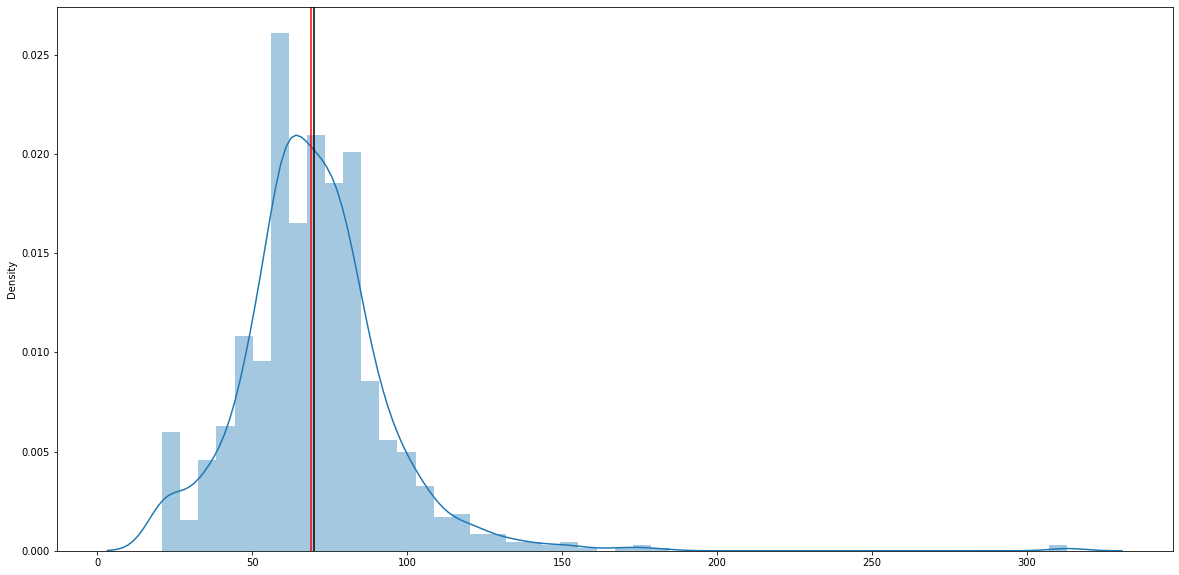

Skewness 2.163569142324884
Kurtosis 17.452867259818404


In [174]:
plt.figure(figsize=(20,10))
sns.distplot(x=data['LotFrontage'])
plt.axvline(data['LotFrontage'].mean(),c='black')
plt.axvline(data['LotFrontage'].median(),c='red')
plt.show()

from scipy import stats
print("Skewness",data['LotFrontage'].skew())
print("Kurtosis",data['LotFrontage'].kurt())

> Observation 
It can be seen that the variable lotfrontage area is positively skewed. Hence we impute the median instead of mean

In [175]:
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)

In [176]:
# percentage of missing data
100*(data.isna().sum().sort_values(ascending=False).head(10))/len(data)
#only top 10 are displayed as there are a large number of columns

Id              0.0
CentralAir      0.0
GarageYrBlt     0.0
GarageType      0.0
FireplaceQu     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
dtype: float64

> Observation
It can be seen that all the missing values have been dealt with

# Performing EDA

In [177]:
# The following code was used to viualise all the columns and identify important patterns. 
# However, keeping all the graphs would make inferences difficult and the file size too large.
# hence, only the important features are plotted again and observations are explained 

# One could uncomment the below snippet to visualise all graphs 

"""
for col in num_cont_cols:
  plt.figure(figsize=(20,10))
  sns.distplot(x=data[col])
  plt.xlabel(col,fontsize=20)
  plt.title('Distribution of {}'.format(col))
  plt.show()
  print("Skewness",data[col].skew())
  print("Kurtosis",data[col].kurt())
"""

'\nfor col in num_cont_cols:\n  plt.figure(figsize=(20,10))\n  sns.distplot(x=data[col])\n  plt.xlabel(col,fontsize=20)\n  plt.title(\'Distribution of {}\'.format(col))\n  plt.show()\n  print("Skewness",data[col].skew())\n  print("Kurtosis",data[col].kurt())\n'

In [178]:
# The following code was used to viualise all the columns and identify important patterns. 
# However, keeping all the graphs would make inferences difficult and the file size too large.
# hence, only the important features are plotted again and observations are explained 

# One could uncomment the below snippet to visualise all graphs 
"""
for col in cat_cols:
  plt.figure(figsize=(20,10))
  data[col].value_counts().plot(kind='bar')
  plt.xlabel(col,fontsize=15)
  #plt.title('Distribution of {}'.format(col))
  plt.show()
"""

"\nfor col in cat_cols:\n  plt.figure(figsize=(20,10))\n  data[col].value_counts().plot(kind='bar')\n  plt.xlabel(col,fontsize=15)\n  #plt.title('Distribution of {}'.format(col))\n  plt.show()\n"

In [179]:
# The following code was used to viualise all the columns and identify important patterns. 
# However, keeping all the graphs would make inferences difficult and the file size too large.
# hence, only the important features are plotted again and observations are explained 

# One could uncomment the below snippet to visualise all graphs 
"""
for col in num_discrete_cols:
  plt.figure(figsize=(20,10))
  data[col].value_counts().plot(kind='bar')
  plt.xlabel(col,fontsize=15)
  #plt.title('Distribution of {}'.format(col))
  plt.show()
"""

"\nfor col in num_discrete_cols:\n  plt.figure(figsize=(20,10))\n  data[col].value_counts().plot(kind='bar')\n  plt.xlabel(col,fontsize=15)\n  #plt.title('Distribution of {}'.format(col))\n  plt.show()\n"

In [180]:
# Distribution of data in categorical columns in text format 
for col in cat_cols:
  print(col)
  print(data[col].value_counts()*100/len(data))
  print('='*70)

MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
Street
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
Alley
No alley access    93.767123
Grvl                3.424658
Pave                2.808219
Name: Alley, dtype: float64
LotShape
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
Utilities
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
LotConfig
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
LandSlope
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
Neighborhood
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411


# EDA of Important variables

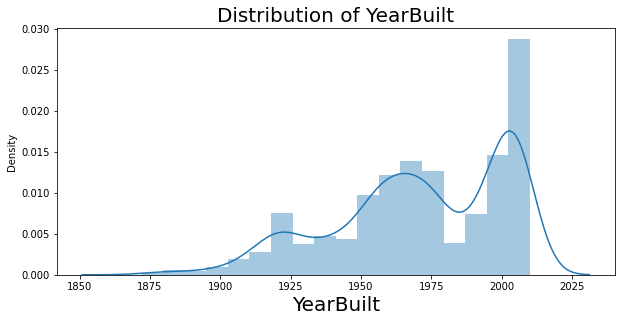

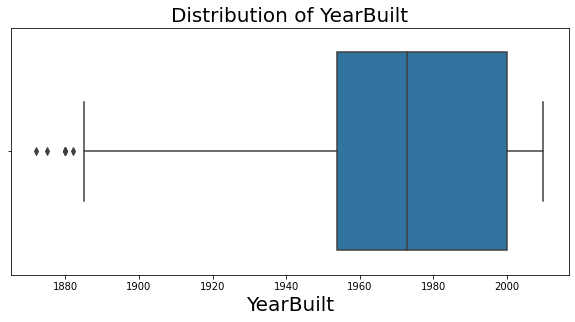

Skewness -0.613461172488183
Kurtosis -0.43955194159361977


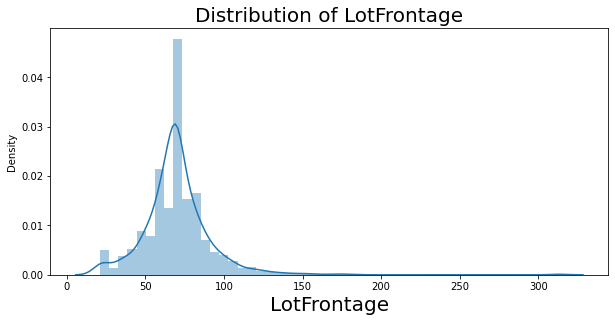

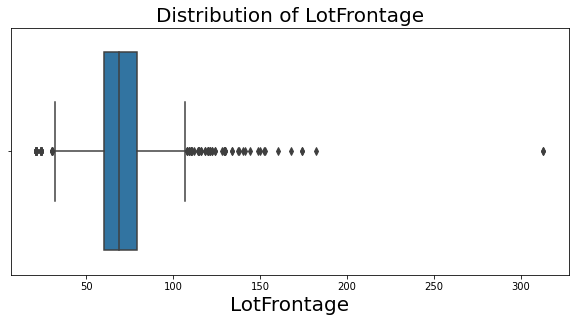

Skewness 2.4091466665496006
Kurtosis 21.91295419680548


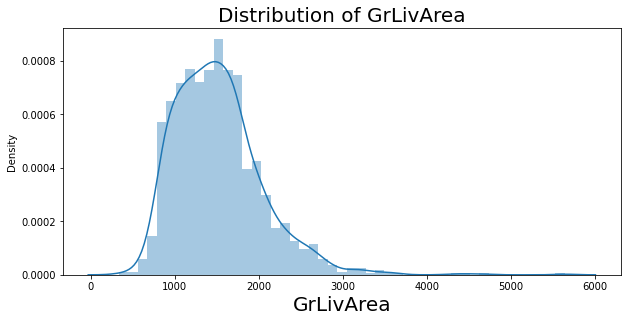

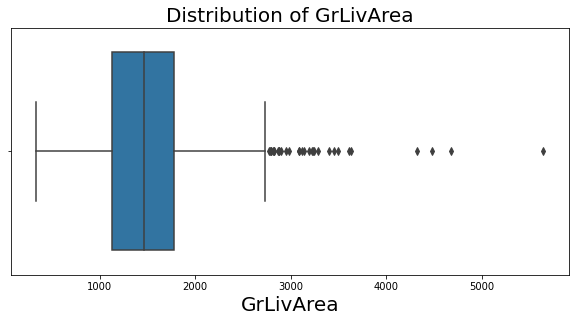

Skewness 1.3665603560164552
Kurtosis 4.895120580693174


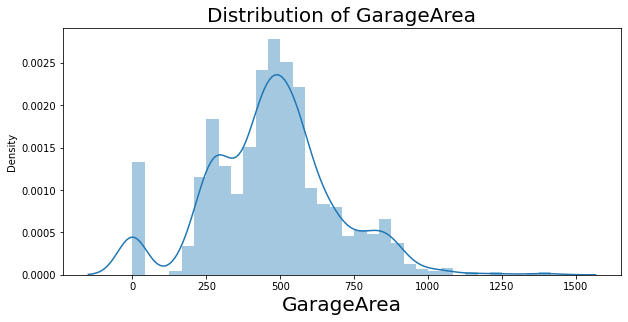

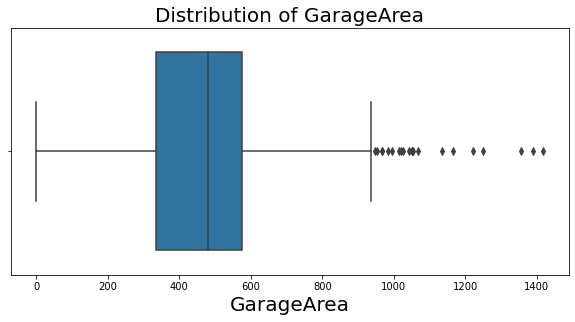

Skewness 0.17998090674623907
Kurtosis 0.9170672022708684


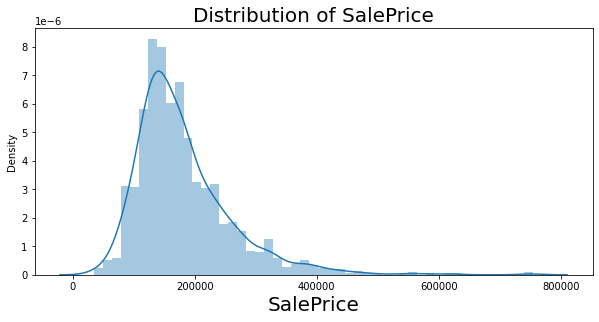

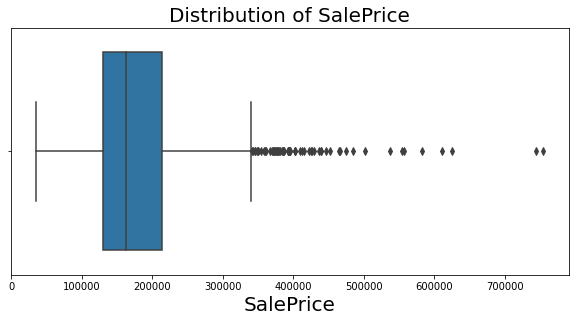

Skewness 1.8828757597682129
Kurtosis 6.536281860064529


In [181]:
for col in ['YearBuilt','LotFrontage','GrLivArea','GarageArea','SalePrice']:

  plt.figure(figsize=(10,10))
  plt.subplot(2,1,1)
  sns.distplot(x=data[col])
  plt.xlabel(col,fontsize=20)
  plt.title('Distribution of {}'.format(col),fontsize=20)
  plt.show()

  plt.figure(figsize=(10,10))
  plt.subplot(2,1,2)
  sns.boxplot(x=data[col])
  plt.xlabel(col,fontsize=20)
  plt.title('Distribution of {}'.format(col),fontsize=20)
  plt.show()
  print("Skewness",data[col].skew())
  print("Kurtosis",data[col].kurt())
  print('='*100)

> observation 

1. Year built is not normally distributed but rather has 3 local peaks, so this variable can be bucketed. Has few outliers
2. LotFrontAge is highly skewed, contains loutliers, in order to use it for linear regresssion, we can perform log transform on it. 
3. The skewness of GrLivArea is 1.366 indicating positve skewness, to improve model performance we can perform log transformation. Contains few outliers
4. Though GarageArea is not perfectly a normal distribution, the skewness is low and can be considered good for modelling
5. Sale price being the target variable, is of prime importance. It can be seen that it has a positive skew of 1.88. One of the assumption of linear regression is that the target variable is normally distributed. Hence we can perform transformation on the target variable to convert it into a normally distributed variable


In [182]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0        1          60       RL         65.0     8450   Pave  No alley access   
1        2          20       RL         80.0     9600   Pave  No alley access   
2        3          60       RL         68.0    11250   Pave  No alley access   
3        4          70       RL         60.0     9550   Pave  No alley access   
4        5          60       RL         84.0    14260   Pave  No alley access   
5        6          50       RL         85.0    14115   Pave  No alley access   
6        7          20       RL         75.0    10084   Pave  No alley access   
7        8          60       RL         69.0    10382   Pave  No alley access   
8        9          50       RM         51.0     6120   Pave  No alley access   
9       10         190       RL         50.0     7420   Pave  No alley access   
10      11          20       RL         70.0    11200   Pave  No alley access   
11      12          60       RL         85.0    11924   Pave  No alley access   
12      13          20       RL         69.0    12968   Pave  No alley access   
13      14          20       RL         91.0    10652   Pave  No alley access   
14      15          20       RL         69.0    10920   Pave  No alley access   
15      16          45       RM         51.0     6120   Pave  No alley access   
16      17          20       RL         69.0    11241   Pave  No alley access   
17      18          90       RL         72.0    10791   Pave  No alley access   
18      19          20       RL         66.0    13695   Pave  No alley access   
19      20          20       RL         70.0     7560   Pave  No alley access   
20      21          60       RL        101.0    14215   Pave  No alley access   
21      22          45       RM         57.0     7449   Pave             Grvl   
22      23          20       RL         75.0     9742   Pave  No alley access   
23      24         120       RM         44.0     4224   Pave  No alley access   
24      25          20       RL         69.0     8246   Pave  No alley access   
25      26          20       RL        110.0    14230   Pave  No alley access   
26      27          20       RL         60.0     7200   Pave  No alley access   
27      28          20       RL         98.0    11478   Pave  No alley access   
28      29          20       RL         47.0    16321   Pave  No alley access   
29      30          30       RM         60.0     6324   Pave  No alley access   
30      31          70  C (all)         50.0     8500   Pave             Pave   
31      32          20       RL         69.0     8544   Pave  No alley access   
32      33          20       RL         85.0    11049   Pave  No alley access   
33      34          20       RL         70.0    10552   Pave  No alley access   
34      35         120       RL         60.0     7313   Pave  No alley access   
35      36          60       RL        108.0    13418   Pave  No alley access   
36      37          20       RL        112.0    10859   Pave  No alley access   
37      38          20       RL         74.0     8532   Pave  No alley access   
38      39          20       RL         68.0     7922   Pave  No alley access   
39      40          90       RL         65.0     6040   Pave  No alley access   
40      41          20       RL         84.0     8658   Pave  No alley access   
41      42          20       RL        115.0    16905   Pave  No alley access   
42      43          85       RL         69.0     9180   Pave  No alley access   
43      44          20       RL         69.0     9200   Pave  No alley access   
44      45          20       RL         70.0     7945   Pave  No alley access   
45      46         120       RL         61.0     7658   Pave  No alley access   
46      47          50       RL         48.0    12822   Pave  No alley access   
47      48          20       FV         84.0    11096   Pave  No alley access   
48      49         190       RM        

In [186]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

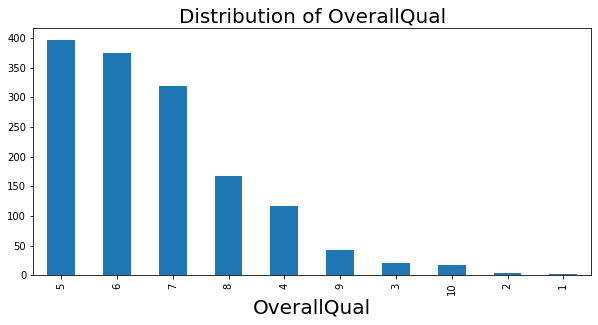

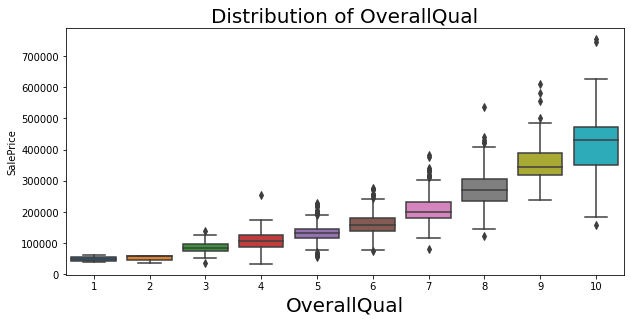

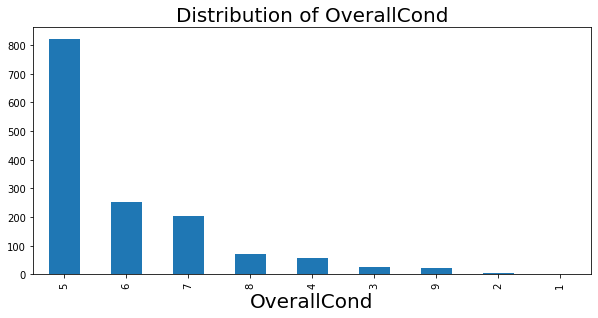

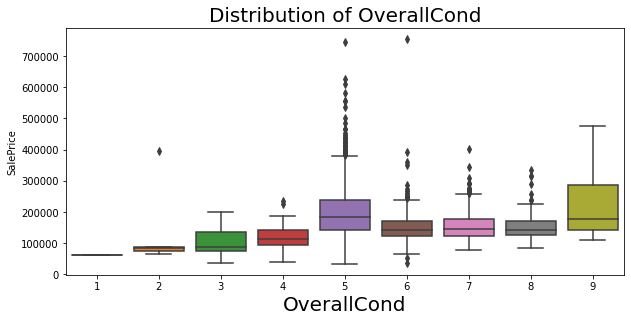

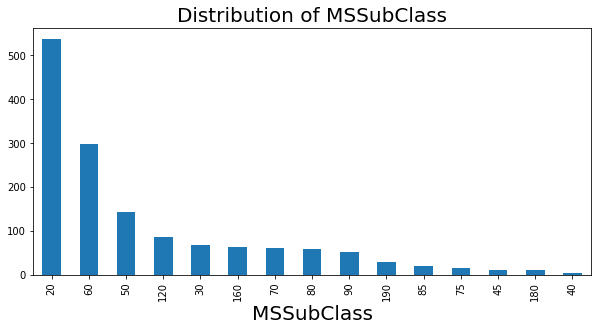

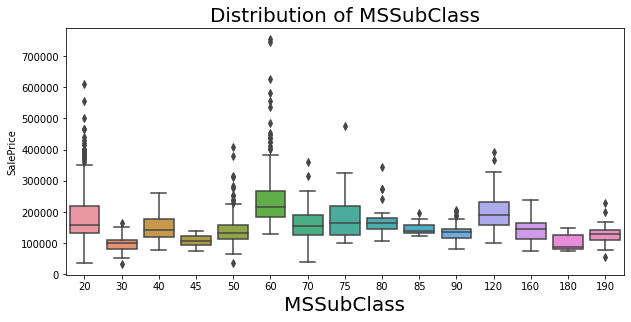

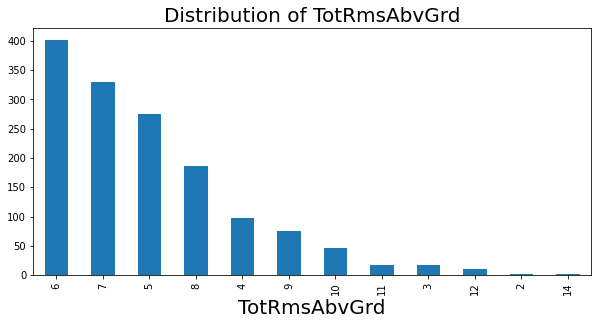

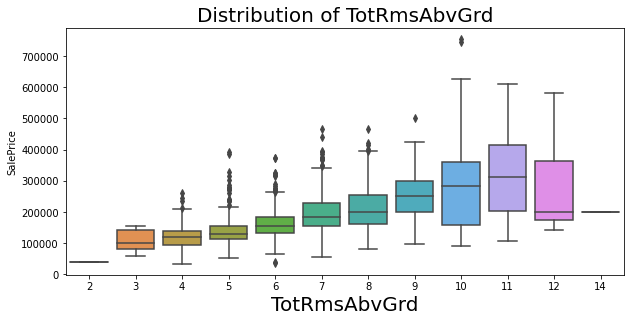

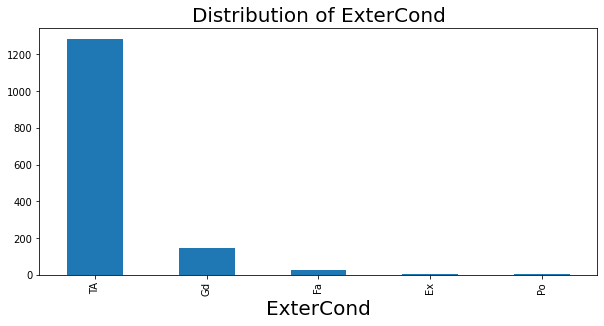

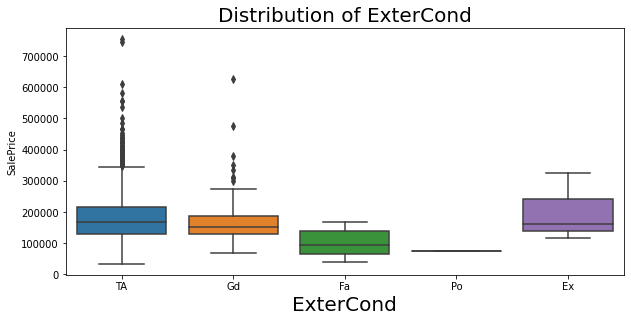

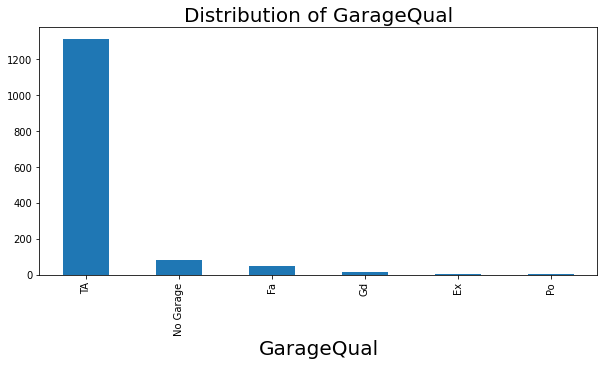

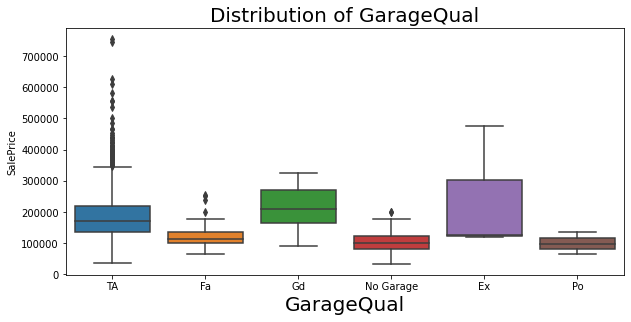

In [189]:
for col in ['OverallQual','OverallCond','MSSubClass','TotRmsAbvGrd','ExterCond','GarageQual']:

  plt.figure(figsize=(10,10))
  plt.subplot(2,1,1)
  data[col].value_counts().plot(kind='bar')
  plt.xlabel(col,fontsize=20)
  plt.title('Distribution of {}'.format(col),fontsize=20)
  plt.show()

  plt.figure(figsize=(10,10))
  plt.subplot(2,1,2)
  sns.boxplot(y=data['SalePrice'],x=data[col])
  plt.xlabel(col,fontsize=20)
  plt.title('Distribution of {}'.format(col),fontsize=20)
  plt.show()
  print('='*100)

> Observation
1. The price of the house increase at an exponential rate of the overall condition. Most of the houses have condition of average to very good
2. Surprisingly, the median price of the house is highest when the overall condition is average and even the number of houses are rated as average more often
3. 2-STORY 1946 & NEWER houses have the median sales price
4. MOst houses have 5-7 rooms aboove ground.
5. Almost all houses have similiar garange mainataince, that is average. 



## Correlation

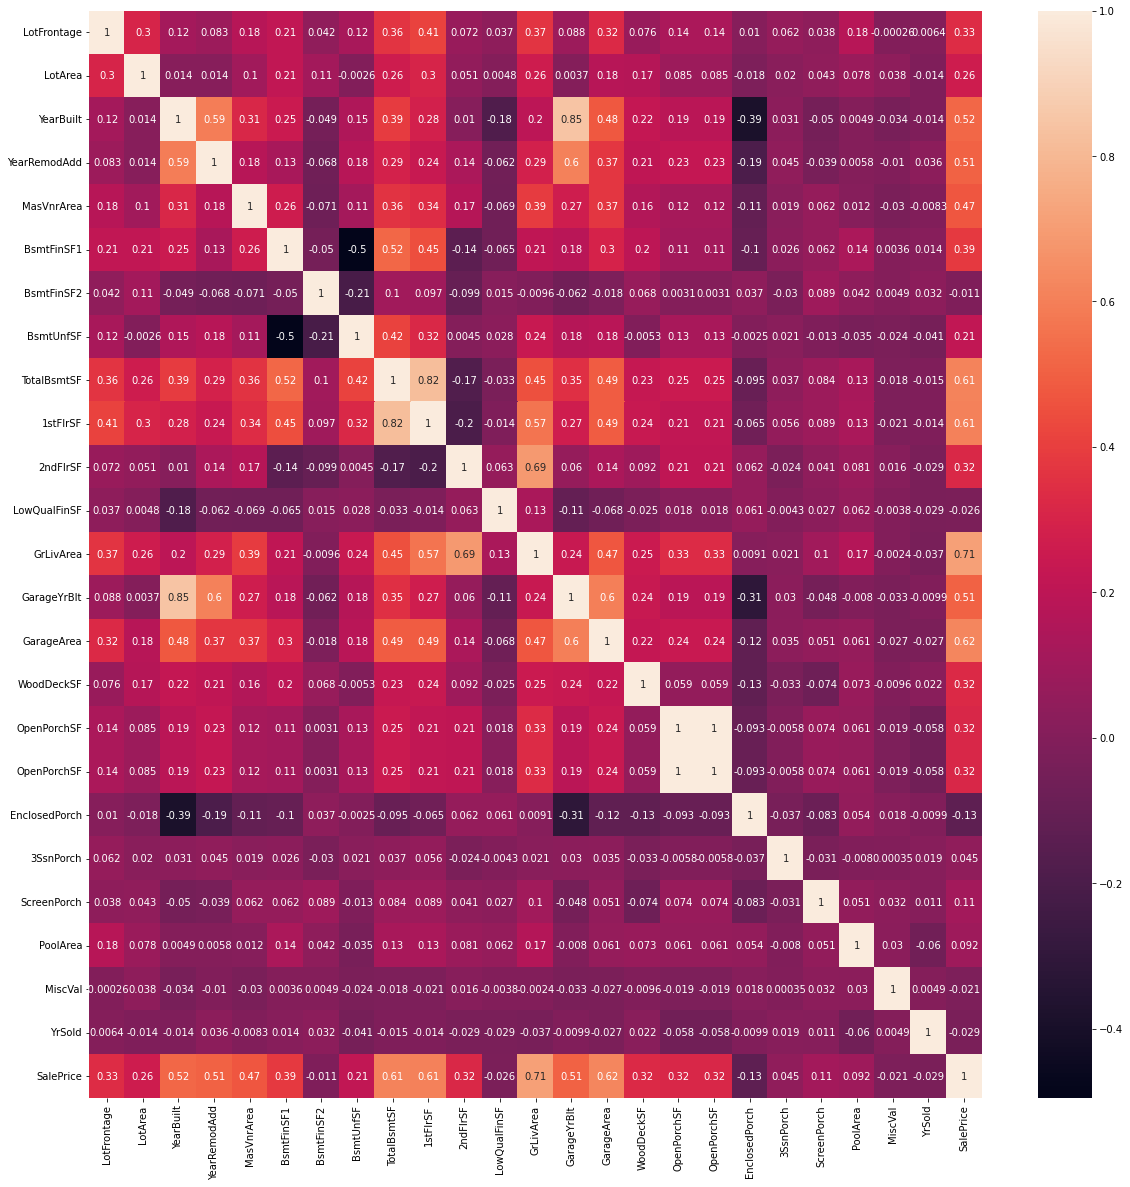

In [208]:
plt.figure(figsize=(20,20))
sns.heatmap(data[num_cont_cols].corr(),annot=True)

In [215]:
# top correlation with target variable
target_corr=data[num_cont_cols].corr().nlargest(10,'SalePrice')['SalePrice']
target_corr


SalePrice       1.000000
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
GarageYrBlt     0.508043
YearRemodAdd    0.507101
MasVnrArea      0.472614
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

## Pairplots


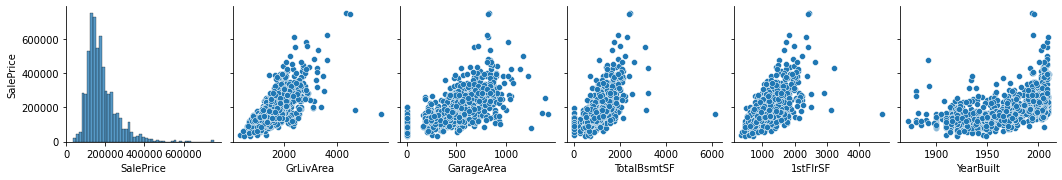

In [219]:
sns.pairplot(data,x_vars=target_corr.keys()[:6],y_vars='SalePrice')